In [1]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go

import numpy as np

from obs_data import *

print(os.getcwd())

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


In [2]:
init_notebook_mode(connected=True)

In [3]:
variable = "CONC"

## Observed

### Detailed

In [4]:
det_name = "ug.g"
detailed = ["n1", "n2", "n3", "n4", "n5", "n7", "n8",
            "t4", "t5", "t7", "t8", "t9", "t10", 
            "s11", "s12", "s13"]

obs_list = []
for i in range(len(detailed)):
    name = detailed[i] + ".tss"
    o = getDetailed(name)
    o = o[det_name].tolist()
    obs_list.append(o)

## Simulated

In [5]:
# Model version and mc-run number:
version = "v10"
folder = "1"

# Working computer
PC = False
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10/


In [6]:
# Time series name
col = 'sim'
sim_list = []
for i in range(len(detailed)):
    name_tss = detailed[i] + variable
    filename = "resM_" + name_tss + ".tss"
    sim = pd.read_table(sim_path + folder + back + filename, 
                                skiprows=4, delim_whitespace=True,
                                names=['Jdays', col],
                                header=None)
    sim_list.append(sim[col].tolist())

## Plotting

In [7]:
# Julian days
# x = s_obs.Jdays.tolist()
dates = getTime(sep=";")
x = dates.Date.tolist()

start = 175
end = 300

### Observed (markers)

In [8]:
# Add markers to data
data = []
for i in range(len(detailed)):
    if detailed[i][0] == "n":
        color = 'red'
    elif detailed[i][0] == "t":
        color = 'green'
    else:
        color = 'blue'
    
    obs = go.Scatter(
        x = x[start:end],
        y = obs_list[i][start:end],
        mode = 'markers',
        name = detailed[i],
        marker=dict(
            color= color,
            line=dict(
                color= 'black', #'rgba(217, 217, 217, 1.0)',
                width=1,
            ),
            symbol='star',
            size=10)
    )
    data.append(obs)

### Simulated

In [9]:
# Add sim lines to data
for i in range(len(detailed)):
    if detailed[i][0] == "n":
        color = 'red'
    elif detailed[i][0] == "t":
        color = 'green'
    else:
        color = 'blue'
    pobj = go.Scatter(
        x = x[start:end],
        y = sim_list[i][start:end],
        mode = 'lines',
        name = detailed[i] + " Sim.",
        marker=dict(color=color))
    data.append(pobj)

In [12]:
%matplotlib inline
import plotlycred
figname = 'D3SoilsConc.png'

online = True
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data) # , layout=layout)
    py.image.save_as(fig, filename=figname)
else:
    iplot(data)


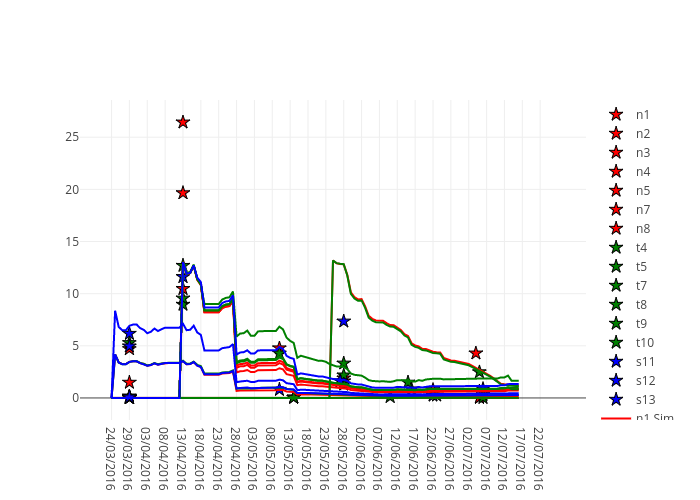

In [13]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)